In [1]:
import os , shutil

In [11]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = r'C:\Users\MHS\Documents\AI\my-code\dataset\train'

# The directory where we will
# store our smaller dataset
base_dir = r'C:\Users\MHS\Documents\AI\my-code\dataset\CatVsDog'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
train_cats_dir

'C:\\Users\\MHS\\Documents\\AI\\my-code\\dataset\\CatVsDog\\train\\cats'

In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training cat images: 1000
total training dog images: 1000


In [15]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation cat images: 500
total validation dog images: 500


In [16]:
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test cat images:', len(os.listdir(test_dogs_dir)))

total test cat images: 500
total test cat images: 500


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [30]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 17, 17, 128)     

In [34]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">  پیش پردازش داده (Data preprocessing)</div>


In [39]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('labels batch :', labels_batch)
    
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
labels batch : [0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]


In [44]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


C:\Users\MHS\AppData\Local\Temp\ipykernel_9072\3259228942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 18s 117ms/step - loss: 0.6896 - acc: 0.5350 - val_loss: 0.6748 - val_acc: 0.5980
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6561 - acc: 0.6080 - val_loss: 0.6409 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6146 - acc: 0.6760 - val_loss: 0.6170 - val_acc: 0.6580
Epoch 4/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5667 - acc: 0.7055 - val_loss: 0.6299 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5397 - acc: 0.7300 - val_loss: 0.5683 - val_acc: 0.7100
Epoch 6/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5131 - acc: 0.7460 - val_loss: 0.5572 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4767 - acc: 0.7640 - val_loss: 0.5608 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4

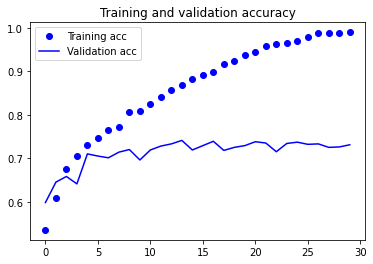

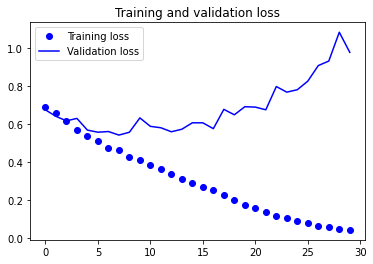

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">شبکه با Dropout</div>

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100


C:\Users\MHS\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
C:\Users\MHS\AppData\Local\Temp\ipykernel_9072\666948056.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 6s 51ms/step - loss: 0.6937 - acc: 0.5250 - val_loss: 0.6779 - val_acc: 0.5890
Epoch 2/100
100/100 [==============================] - 5s 52ms/step - loss: 0.6722 - acc: 0.5815 - val_loss: 0.6694 - val_acc: 0.5430
Epoch 3/100
100/100 [==============================] - 5s 50ms/step - loss: 0.6425 - acc: 0.6125 - val_loss: 0.6745 - val_acc: 0.5600
Epoch 4/100
100/100 [==============================] - 5s 49ms/step - loss: 0.5992 - acc: 0.6690 - val_loss: 0.6163 - val_acc: 0.6520
Epoch 5/100
100/100 [==============================] - 5s 51ms/step - loss: 0.5711 - acc: 0.6965 - val_loss: 0.6025 - val_acc: 0.6690
Epoch 6/100
100/100 [==============================] - 5s 51ms/step - loss: 0.5573 - acc: 0.7050 - val_loss: 0.6345 - val_acc: 0.6490
Epoch 7/100
100/100 [==============================] - 5s 52ms/step - loss: 0.5293 - acc: 0.7255 - val_loss: 0.5876 - val_acc: 0.6820
Epoch 8/100
100/100 [==============================] - 5s 52ms/step - loss

Epoch 62/100
100/100 [==============================] - 5s 50ms/step - loss: 0.0530 - acc: 0.9815 - val_loss: 0.8962 - val_acc: 0.7690
Epoch 63/100
100/100 [==============================] - 5s 50ms/step - loss: 0.0574 - acc: 0.9805 - val_loss: 0.8858 - val_acc: 0.7690
Epoch 64/100
100/100 [==============================] - 5s 50ms/step - loss: 0.0462 - acc: 0.9830 - val_loss: 0.9071 - val_acc: 0.7740
Epoch 65/100
100/100 [==============================] - 5s 49ms/step - loss: 0.0389 - acc: 0.9890 - val_loss: 1.1153 - val_acc: 0.7430
Epoch 66/100
100/100 [==============================] - 5s 49ms/step - loss: 0.0447 - acc: 0.9840 - val_loss: 0.9408 - val_acc: 0.7640
Epoch 67/100
100/100 [==============================] - 5s 49ms/step - loss: 0.0414 - acc: 0.9870 - val_loss: 0.9007 - val_acc: 0.7680
Epoch 68/100
100/100 [==============================] - 5s 51ms/step - loss: 0.0346 - acc: 0.9905 - val_loss: 0.9966 - val_acc: 0.7660
Epoch 69/100
100/100 [==============================] -

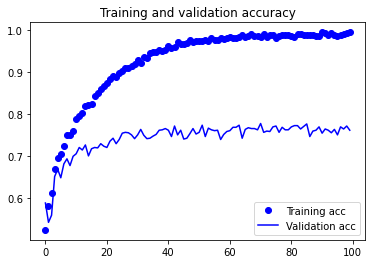

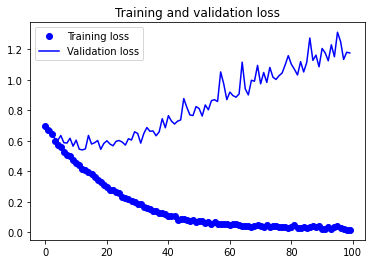

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ذخیره کردن مدل</div>


In [55]:
model.save('cats_and_dogs_small_1.h5')